In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
import sweetviz as sv
from pandas_profiling import ProfileReport
from sklearn import datasets


In [2]:
mp = pd.read_csv('~/Downloads/Metaphlan4_all_pheno_mtx.csv').rename(columns={'Unnamed: 0' : 'External ID'})
mp = mp.set_index('External ID')
mp

,k__Bacteria,p__Bacteroidetes,p__Firmicutes,p__Proteobacteria,c__Bacteroidia,c__Clostridia,c__Betaproteobacteria,c__Deltaproteobacteria,c__Negativicutes,o__Bacteroidales,...,t__SGB14005,t__SGB6358,t__SGB14007,t__SGB6276,t__SGB47307,t__SGB6343,t__SGB4665,t__SGB4924_group,t__SGB6350,t__SGB4921
External ID,,,,,,,,,,,,,,,,,,,,,
PSM7J14T,100.00000,54.45901,42.30283,3.23816,54.45901,42.13480,3.06251,0.17565,0.16803,54.45901,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
CSM79HOL,100.00000,74.30125,19.73015,5.96860,74.30125,18.73846,5.90910,0.05950,0.87724,74.30125,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
CSM67U9D,100.00000,61.96323,33.78890,4.22338,61.96323,30.09409,4.09011,0.13327,3.02112,61.96323,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
HSM7J4N4,100.00000,98.82760,0.08455,1.08784,98.82760,30.09409,4.09011,1.02587,0.08455,98.82760,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
CSM79HJS,100.00000,67.99864,21.24469,10.51531,67.99864,21.18760,6.34576,4.16955,0.08455,67.99864,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HSM7J4R2,100.00000,67.21618,28.10759,4.53335,67.21618,28.10759,3.63017,0.90317,2.24913,67.21618,...,1.03302,5.24979,1.56167,0.02168,0.03508,0.01656,0.02498,0.00194,0.01401,0.00823
MSM79H9A,99.39144,65.91204,24.18585,1.24318,65.91204,21.15077,3.63017,0.90317,2.24913,65.91204,...,1.03302,5.24979,1.56167,0.02168,0.03508,0.01656,0.02498,0.00194,0.01401,0.00823
HSM7J4KK,100.00000,44.55882,47.48655,6.54281,44.47365,47.35033,4.39404,1.54232,0.09869,44.47365,...,1.03302,5.24979,1.56167,0.02168,0.03508,0.01656,0.02498,0.00194,0.01401,0.00823


In [3]:

select_sampels = pd.read_csv('~/Desktop/selected_samples_MTX.csv')
select_sampels = select_sampels.set_index('External ID')
select_sampels.drop("Participant ID", inplace=True, axis=1)

In [4]:

mp = mp.loc[select_sampels.index,:]
mp = mp.loc[:,mp.columns.str.startswith('s__')]
mp["diagnosis"] = select_sampels.iloc[:,-1]
mp.reset_index(inplace=True)

In [5]:
features = mp.iloc[:, 1:-1]
targets = mp.iloc[:, -1]
features

,s__Faecalibacterium_prausnitzii,s__Alistipes_putredinis,s__Phocaeicola_vulgatus,s__Bacteroides_uniformis,s__Roseburia_faecis,s__Eubacterium_rectale,s__Ruminococcus_bromii,s__Sutterella_wadsworthensis,s__Alistipes_ihumii,s__Alistipes_finegoldii,...,s__Bacteroides_pectinophilus,s__GGB1095_SGB1407,s__GGB4698_SGB6498,s__GGB33665_SGB47358,s__Bacilli_unclassified_SGB6422,s__GGB4596_SGB6358,s__Clostridia_unclassified_SGB6276,s__GGB3491_SGB4665,s__Lachnospiraceae_unclassified_SGB4924,s__GGB3632_SGB4921
0,0.70328,26.34531,15.90158,16.57388,0.80660,0.05442,3.26140,3.35348,3.00153,1.37542,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,3.42227,7.40241,54.60595,1.26240,1.21899,0.16635,0.86426,4.60886,1.05645,19.44767,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,1.10362,27.37469,24.29734,25.34844,35.19635,6.13330,1.23063,4.28426,1.07896,2.90521,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.36812,21.00603,5.70537,9.13896,15.56860,2.77998,0.00000,1.94239,0.08045,6.77532,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,1.37704,22.15330,13.09748,1.64181,3.29049,3.67220,1.23063,5.33769,1.07896,3.69499,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,6.40264,27.44222,13.02034,4.85856,3.59544,2.50049,1.19270,13.85508,0.41139,0.04133,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
74,1.28231,5.65627,3.45556,3.29641,0.50181,0.55251,0.08247,0.60446,0.26766,0.07724,...,2.74091,0.69734,0.25622,0.04672,0.17089,5.24979,0.02168,0.02498,0.00194,0.00823
75,4.07790,33.97635,8.41267,7.75968,0.49751,0.61583,0.28134,1.74513,1.74263,2.74263,...,2.74091,0.69734,0.25622,0.04672,0.17089,0.52374,0.02168,0.02498,0.00194,0.00823
76,1.88777,25.26837,12.09764,6.35536,1.95400,1.86681,0.38573,2.56970,0.10734,3.36402,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [20]:
MTX_X = features
MTX_y = targets

#fill NA's
MTX_X.fillna(MTX_X.median(), inplace=True)
MTX_X = StandardScaler().fit_transform(MTX_X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(MTX_X, MTX_y, test_size=0.30, random_state=42)

Best Model:
RandomForestClassifier(max_features=4, min_samples_split=5, n_estimators=10,
                       random_state=42)


<AxesSubplot:>

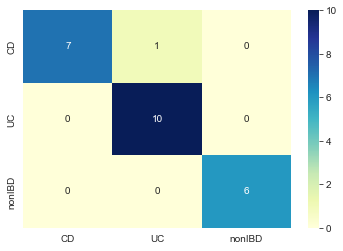

In [21]:
n_estimators_RF = [5, 10, 25, 50, 100]
max_features_RF = [2,4,8,16,32,None]
parameters_RF = {'n_estimators': n_estimators_RF,
                'max_features': max_features_RF}

RF_model = RandomForestClassifier(max_depth=None,
                                  min_samples_split=5, random_state=42)
RF_clf = GridSearchCV(RF_model, parameters_RF, cv=5, scoring= 'accuracy') #completeness_score')

RF_clf.fit(X_train, y_train)

print("Best Model:")
RF_model = RF_clf.best_estimator_
print(RF_model)

RF_predictions = RF_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_RF = confusion_matrix(y_test, RF_predictions,labels=labels)
cm_RF = pd.DataFrame(cm_RF, index=labels, columns=labels)
sns.heatmap(cm_RF, cmap="YlGnBu", annot=True)

In [22]:
from sklearn import metrics
print(f'Accuracy {round(metrics.accuracy_score(y_test, RF_predictions)*100,2)}%')

Accuracy 95.83%


In [308]:
# from sklearn import tree
# import graphviz
# from IPython.display import Image
#
# for g in range(len(RF_clf.best_estimator_)):
#     Dgraph = tree.export_graphviz(RF_clf.best_estimator_[g], class_names= targets, feature_names= features.columns,filled=True, special_characters=True)
#     graph = graphviz.Source(Dgraph)
#     graph.view(f'~/Desktop/{g}_tree')
# # graph.savefig('~Desktop/test123.png', dpi=1800) # high resolution graph
#     graph

In [45]:
imp_df = pd.DataFrame({
    "": features.columns,
    "feature_importances": RF_clf.best_estimator_.feature_importances_
})
species_threshold = 0.01
feature_importances = imp_df.sort_values(by="feature_importances", ascending=False)

# Displays the number of values greater than zero
print(len(feature_importances[feature_importances.feature_importances>0]))

feature_importances['bool'] = feature_importances['feature_importances'] >= species_threshold
feature_importances = feature_importances[feature_importances['bool'] == True].T
#
feature_importances.columns = feature_importances.iloc[0]
feature_importances = feature_importances[1:1]

# feature_importances = imp_df.sort_values(by="feature_importances", ascending=False).to_csv('~/Desktop/feature_importances_MTX.csv')



34


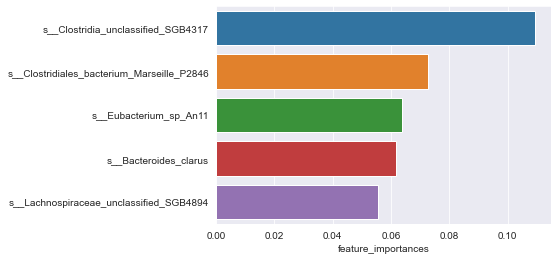

In [23]:
imp_df = pd.DataFrame({
    "": features.columns,
    "feature_importances": RF_clf.best_estimator_.feature_importances_
})
feature_importances_top_5 = imp_df.sort_values(by="feature_importances", ascending=False).head(5)
sns.barplot(x='feature_importances', y= "", data= feature_importances_top_5)
plt.show()
feature_importances_top_5 = feature_importances_top_5.T
feature_importances_top_5.columns = feature_importances_top_5.iloc[0]
feature_importances_top_5 = feature_importances_top_5[1:1]



In [24]:
feature_importances_mp = mp.loc[:,feature_importances_top_5.columns]
feature_importances_mp['diagnosis'] = mp["diagnosis"]
feature_importances_mp
# feature_importances_mp = feature_importances_mp.groupby('diagnosis')
# feature_importances_mp.reset_index(inplace=True)

,s__Clostridia_unclassified_SGB4317,s__Clostridiales_bacterium_Marseille_P2846,s__Eubacterium_sp_An11,s__Bacteroides_clarus,s__Lachnospiraceae_unclassified_SGB4894,diagnosis
0,0.00000,0.08988,0.18242,0.10497,0.21956,CD
1,0.00000,0.08988,0.04317,0.07565,0.21956,CD
2,1.18662,0.00000,0.00000,0.00000,0.00000,UC
3,0.00000,0.00000,0.00000,0.00000,0.00000,UC
4,1.18662,0.00000,0.00000,0.00000,0.00000,UC
...,...,...,...,...,...,...
73,0.00000,0.08988,2.42156,0.32426,0.30306,CD
74,5.20230,0.00000,0.00000,0.00000,0.01394,nonIBD
75,5.61802,0.00000,0.00000,0.00000,0.01394,nonIBD
76,0.00000,0.08988,0.18242,0.07565,0.21956,CD


s__Clostridia_unclassified_SGB4317


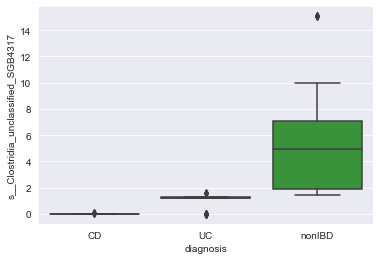

s__Clostridiales_bacterium_Marseille_P2846


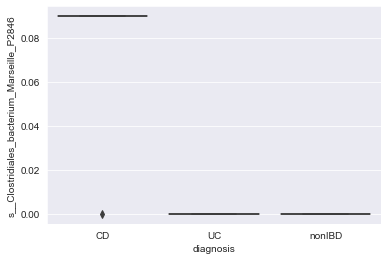

s__Eubacterium_sp_An11


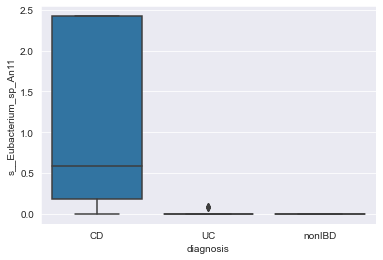

s__Bacteroides_clarus


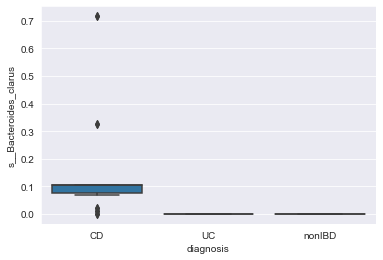

s__Lachnospiraceae_unclassified_SGB4894


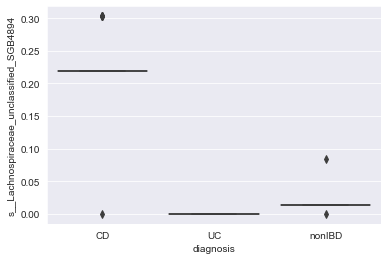

In [372]:
for column_name in feature_importances_mp.iloc[:,:-1]:
    print(column_name)
    sns.boxplot(data=feature_importances_mp, x="diagnosis", y=feature_importances_mp[column_name])
    plt.show()

In [373]:
feature_importances_mp = mp.loc[:,feature_importances_top_5.columns]
feature_importances_mp[:] = np.where(feature_importances_mp == 0,0,1)
feature_importances_mp['diagnosis'] = mp["diagnosis"]
feature_importances_mp

,s__Clostridia_unclassified_SGB4317,s__Clostridiales_bacterium_Marseille_P2846,s__Eubacterium_sp_An11,s__Bacteroides_clarus,s__Lachnospiraceae_unclassified_SGB4894,diagnosis
0,0.0,1.0,1.0,1.0,1.0,CD
1,0.0,1.0,1.0,1.0,1.0,CD
2,1.0,0.0,0.0,0.0,0.0,UC
3,0.0,0.0,0.0,0.0,0.0,UC
4,1.0,0.0,0.0,0.0,0.0,UC
...,...,...,...,...,...,...
73,0.0,1.0,1.0,1.0,1.0,CD
74,1.0,0.0,0.0,0.0,1.0,nonIBD
75,1.0,0.0,0.0,0.0,1.0,nonIBD
76,0.0,1.0,1.0,1.0,1.0,CD


s__Clostridia_unclassified_SGB4317


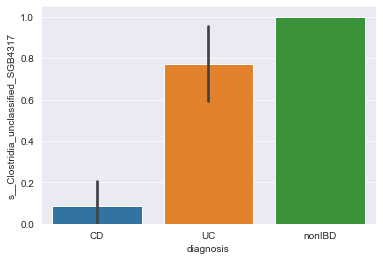

s__Clostridiales_bacterium_Marseille_P2846


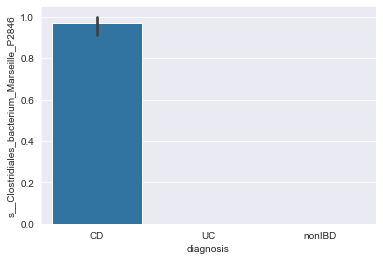

s__Eubacterium_sp_An11


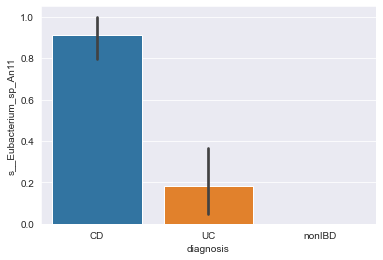

s__Bacteroides_clarus


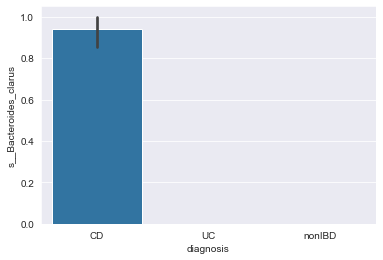

s__Lachnospiraceae_unclassified_SGB4894


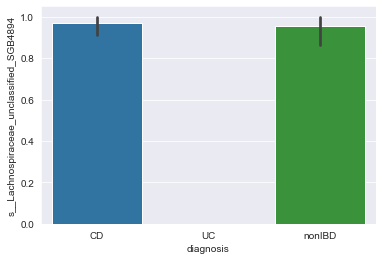

In [374]:
for column_name in feature_importances_mp.iloc[:,:-1]:
    print(column_name)
    sns.barplot(data=feature_importances_mp, x="diagnosis", y=feature_importances_mp[column_name])
    plt.show()